<a href="https://colab.research.google.com/github/sanz-jpst/c_Intro/blob/main/fft_monopro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# フーリエ変換（Fourier transform: FT）

## フーリエ変換について

音響の話で絶対にでてくる話題としてフーリエ変換というものがある．

フーリエ変換というのは

<img src="https://upload.wikimedia.org/wikipedia/commons/a/aa/Fourier2.jpg" width="350pt">

(ジョセフ・フーリエ　引用：[wikipedia](https://ja.wikipedia.org/wiki/%E3%82%B8%E3%83%A7%E3%82%BC%E3%83%95%E3%83%BB%E3%83%95%E3%83%BC%E3%83%AA%E3%82%A8))

このおっちゃんが考えた天才的な理論

「すべての関数は三角算数の級数で表すことができるやで」

に基づいた変換である．

## Python

今回はPythonという言語を使って音声データをフーリエ変換していきます．
Pythonについては下に簡単にまとめておきますが各自で調べてみてください．

### パッケージ

In [ ]:
!pip install japanize-matplotlib # matplotlibで日本語を使うためのおまじない

     |████████████████████████████████| 4.1 MB 5.2 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=2159c5fa177cc5f074f0f1d23fffea2a22bf9162a93b25d45ac2018c8b0c46bc
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [ ]:
%matplotlib inline
import numpy as np    # 高度な数値演算を行うパッケージ
import matplotlib.pyplot as plt   # 図を作成するパッケージ
import japanize_matplotlib  # matplotlibで日本語を使うためのおまじない
import IPython.display    # jupyter上で音声を再生するためのパッケージ

### Pythonで簡単な数字演算

In [ ]:
1 + 1

2

In [ ]:
x =  1 # int型など宣言しなくても自動で型を決めてくれる
print(x)

1


In [ ]:
x = [] # 配列を作成
x.append(1) # 配列に1を追加
print(x)
x.append(2) # 配列に2を追加
print(x)

[1]
[1, 2]


In [ ]:
t = np.arange(0,10) # 0から9までの配列をつくる関数
print(t)

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
s = t + 1   # 配列全体に1を足す
print(s)

[ 1  2  3  4  5  6  7  8  9 10]


In [ ]:
for i in [1, 2, 3]: # 配列の中身文だけ繰り返しを実行
  print(i)

1
2
3


In [ ]:
for i in np.arange(1, 4):
  print(i)

1
2
3


### Pythonで図のプロット

$y=2x$のグラフを$x$が0から9までをプロット

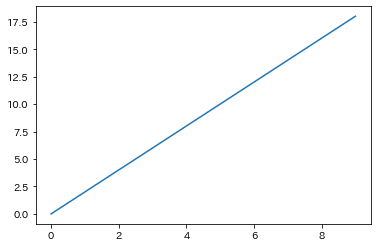

In [ ]:
x = np.arange(0,10) # 0から9まで
y = 2*x             # y=2x

plt.plot(x,y)         # 横軸x 縦軸yプロット
plt.show()          # 描画

$y = x^2$グラフを$x$が0から10までをプロット

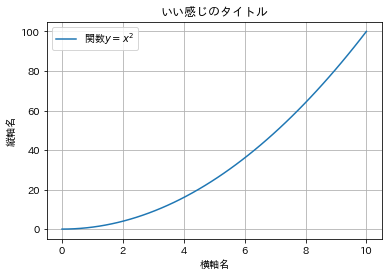

In [ ]:
x = np.linspace(0,10) # 0から10までの配列を作成
y = x**2             # y=x**2

plt.plot(x,y,label="関数$y=x^2$")         # 横軸x 縦軸yプロット
plt.title("いい感じのタイトル")               # $$で囲むとTeXの数式風に出力される
plt.xlabel("横軸名")
plt.ylabel("縦軸名")
plt.legend()          # 凡例の表示
plt.grid()            #グリッドを表示
plt.show()          # 描画

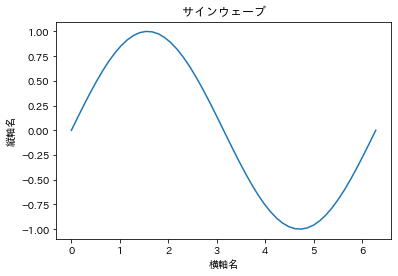

In [ ]:
x = np.linspace(0,2*np.pi) # 0から2πまでの配列を作成
y = np.sin(x)             # y=sin x

plt.plot(x,y,label="関数$y=x^2$")         # 横軸x 縦軸yプロット
plt.title("サインウェーブ")               # $$で囲むとTeXの数式風に出力される
plt.xlabel("横軸名")
plt.ylabel("縦軸名")
# plt.legend()          # 凡例の表示
# plt.grid()            #グリッドを表示
plt.show()          # 描画

## すべての関数を三角関数の級数で表すとは何なのか

### フーリエ級数

関数をある信号とすると，信号を周波数と位相の異なる正弦波と直流成分に分解して解析を行うもの

周期$T$である周期信号$f(t)$について考える．
その信号を三角関数の級数とすると以下のように表される．

$$f(t)=a_0 + \sum_{n=1}^\infty\left( a_n\cos 2\pi\frac{n}{T}t+b_n\sin 2\pi\frac{n}{T}t\right)$$

ここで，$a_n$，$b_n(n=1,2,\cdots)$は係数，$a_0$は直流成分である．

この式によってすべての関数を表すことが可能となる．

三角関数で表すためには直流成分$a_0$，コサイン成分の係数$a_n$，サイン成分の係数$b_n$を知る必要がある．

$a_0$は
$$a_0 = \frac{2}{T}\int_{-T/2}^{T/2} f(t)dt$$
$a_n$は
$$a_n = \frac{2}{T}\int_{-T/2}^{T/2} f(t)\cos\left(2\pi\frac{n}{T}t\right)dt$$
$b_n$は
$$b_n = \frac{2}{T}\int_{-T/2}^{T/2} f(t)\sin\left(2\pi\frac{n}{T}t\right)dt$$

によって求める事ができる

### Pythonで確かめてみる

式を見てもピンと来ないと思うので図で解説する

In [ ]:
%matplotlib inline
import numpy as np    # 高度な数値演算を行うパッケージ
import matplotlib.pyplot as plt   # 図を作成するパッケージ

のこぎり波$f(t)$をプロットする

$$f(t)=t\qquad(-\pi\le t < \pi)$$

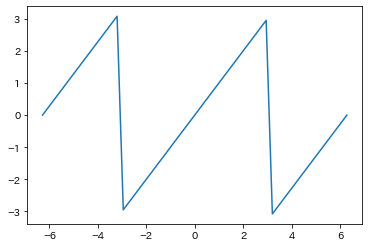

In [ ]:
t = np.linspace(-2*np.pi,2*np.pi)   # 範囲指定
y = []                          # yは配列と定義
for i in t:                        #のこぎり波をつくるfor文
  if i < -np.pi:
    y.append(i+2*np.pi)
  elif i >= -np.pi and i <np.pi:
    y.append(i)
  elif i >= np.pi:
    y.append(i-2*np.pi)

plt.plot(t,y) #　プロット
plt.show()

こののこぎり波を三角関数の組み合わせで再現します．
上記の式を使って係数$a_0$,$a_n$,$b_n$を求める．
$a_0$は
$$\begin{align}
a_0 &= \frac{2}{T}\int_{-T/2}^{T/2} f(t)dt\\
&=\frac{2}{2\pi}\int_{-\pi}^{\pi} tdt=\frac{1}{\pi}\left[\frac{1}{2}t^2\right]_{-\pi}^{\pi}dt=0
\end{align}$$
$a_n$は
$$\begin{align}
a_n &= \frac{2}{T}\int_{-T/2}^{T/2} f(t)\cos\left(2\pi\frac{n}{T}t\right)dt\\
&=\frac{2}{2\pi}\int_{-\pi}^{\pi} t\cos\left(2\pi\frac{n}{2\pi}t\right)dt=0
\end{align}$$
$b_n$は
$$
\begin{align}b_n &= \frac{2}{T}\int_{-T/2}^{T/2} f(t)\sin\left(2\pi\frac{n}{T}t\right)dt\\
&=\frac{1}{\pi}\int_{-\pi}^{\pi} t\sin nt dt=\frac{2}{\pi}\int_{0}^{\pi} t\sin nt dt\\
&=\text{頑張って定積分してみてね}\\
&=\frac{2}{n}(-1)^{n+1}
\end{align}$$

となります．よってのこぎり波$f(t)$を三角関数で表すと

$$\begin{align}
f(t)&=t\qquad(-\pi\le t < \pi)\\
&=\sum_{n=1}^\infty\left(\frac{2}{n}(-1)^{n+1}\sin nt\right)
\end{align}$$

三角関数で表したのこぎり波をPythonで表現すると以下のようになる．
シグマを見るとnを１から無限に足していることがわかるが現実にはそのような処理はできないため回数を決めて実行する

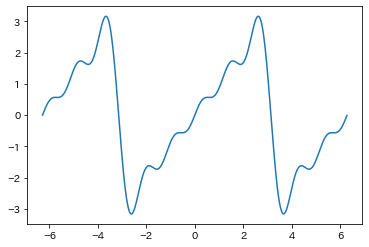

In [ ]:
N = 5 # 足し合わせる回数大きいほど近似される
T = 2 * np.pi
t = np.arange(-2*np.pi, 2*np.pi, 0.01)
y = np.zeros(len(t))
for n in range(1,N+1):
  if n%2:
    y += 2/n * np.sin( n * 2 * np.pi / T * t)
  else:
    y += -2/n * np.sin( n * 2 * np.pi / T * t)
plt.plot(t, y)
plt.show()

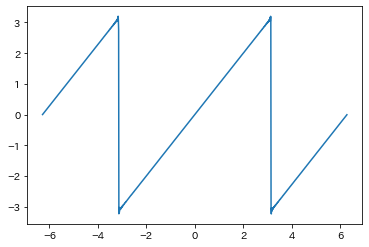

In [ ]:
N = 1000 # 足し合わせる回数大きいほど近似される
T = 2 * np.pi
t = np.arange(-2*np.pi, 2*np.pi, 0.01)
y = np.zeros(len(t))
for n in range(1,N+1):
  if n%2:
    y += 2/n * np.sin( n * 2 * np.pi / T * t)
  else:
    y += -2/n * np.sin( n * 2 * np.pi / T * t)
plt.plot(t, y)
plt.show()

### 複素フーリエ級数
以上のようにフーリエ級数によってのこぎり波を再現することができた

ここで，先程の式をオイラーの公式を使うことにより複素フーリエ級数と呼ばれるものに変形する事ができる．

### 時間領域に着目した複素フーリエ級数

$$
\begin{align}
f(t) &= \sum_{n=-\infty}^\infty c_n e^{j2\pi\frac{n}{T}t}\\
c_n &= \frac{1}{T}\int_{-T/2}^{T/2}f(t)e^{-j2\pi\frac{n}{T}t}dt
\end{align}
$$

## フーリエ変換

### フーリエ級数からフーリエ変換

フーリエ級数は無限に続くような周期関数のみしか扱えないという性質を持っている．

フーリエ変換とは複素フーリエ変換を非周期関数へ拡張したものである．

フーリエ変換は以下のように表す

$$F(\omega)=\mathcal{F}[f(t)]=\int_{-\infty}^\infty f(t)e^{-j\omega t}dt$$

これにより，信号を時間領域から周波数領域に変換することができる．

反対に周波数領域から時間領域に逆変換する逆フーリエ変換は

$$f(t) = \mathcal{F}^{-1}[F(\omega)]=\frac{1}{2\pi}\int_{-\infty}^\infty F(\omega)e^{j\omega t}d\omega$$

と表される．

## 音とは

空気などの振動としましょう

振動を波に見立てることで音を考えましょう下にPythonで音を生成してみます．
生成する音は3音からなるCの和音です．

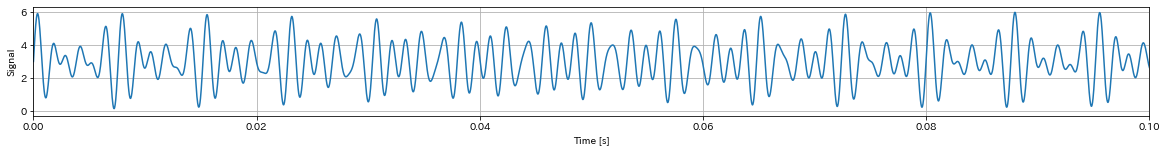

In [ ]:
N = 2**16            # サンプル数
dt = 1/44100          # サンプリング周期 [s]
c, e, g= 525.6, 662.3, 787.6    # 周波数 [Hz]

t = np.arange(0, N*dt, dt) # 時間 [s]
c_tri = np.sin(2*np.pi*c*t) + np.sin(2*np.pi*e*t)+np.sin(2*np.pi*g*t) + 3 # 信号

fig, ax = plt.subplots(figsize=(20,2))
ax.plot(t, c_tri)
ax.set_xlim(0, 0.1)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Signal")
ax.grid()
plt.show()

生成した信号を音声として聞いてみる

In [ ]:
IPython.display.Audio(c_tri, rate=1/dt)

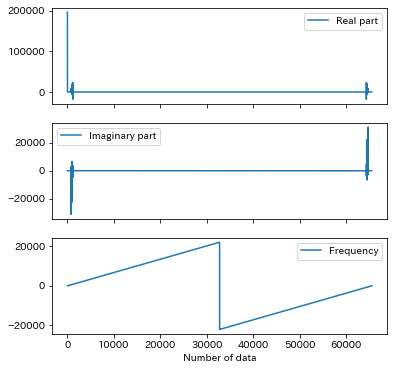

In [ ]:
F = np.fft.fft(c_tri) # 変換結果
freq = np.fft.fftfreq(N, d=dt) # 周波数

fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(6,6))
ax[0].plot(F.real, label="Real part")
ax[0].legend()
ax[1].plot(F.imag, label="Imaginary part")
ax[1].legend()
ax[2].plot(freq, label="Frequency")
ax[2].legend()
ax[2].set_xlabel("Number of data")
plt.show()

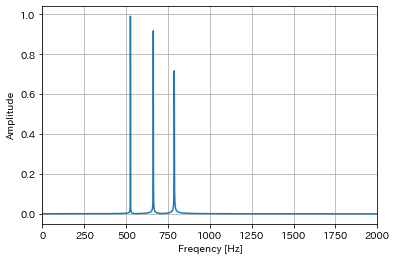

In [ ]:
Amp = np.abs(F/(N/2)) # 振幅

fig, ax = plt.subplots()
ax.plot(freq[1:int(N/2)], Amp[1:int(N/2)])
ax.set_xlim(0,2000)
ax.set_xlabel("Freqency [Hz]")
ax.set_ylabel("Amplitude")
ax.grid()
plt.show()